# DSCI 552 | Homework 8

## Breast Cancer Data

| Key             | Value           |
| --------------- | --------------- |
| Submitted By    | Ruchit Bhardwaj |
| USC ID          | 1111-4177-99    |
| Github Username | ruch0401        |


### 1. Supervised, Semi-Supervised, and Unsupervised Learning

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import os
os.environ['PYTHONWARNINGS'] = 'ignore'

**1(a). Download the Breast Cancer Wisconsin (Diagnostic) Data Set from: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29. Download the data in https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data, which has IDs, classes (Benign=B, Malignant=M), and 30 attributes. This data has two output classes.**

In [2]:
summary = {}

In [3]:
wdbc_data = "../data/wdbc.data.csv"
wdbc_names = "../data/wdbc.names.txt"

wdbc_data = pd.read_csv(wdbc_data, header=None)

temp = []
for i in range(len(wdbc_data.columns)):
    if i == 0:
        temp.append('id')
    elif i == 1:
        temp.append('label')
    else:
        temp.append(f'col{i}')

wdbc_data.columns = temp
wdbc_data.replace({'M': 1, 'B': 0}, inplace=True)
wdbc_data

,id,label,col2,col3,col4,col5,col6,col7,col8,col9,...,col22,col23,col24,col25,col26,col27,col28,col29,col30,col31
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [4]:
wdbc_data['label'].value_counts()

0    357
1    212
Name: label, dtype: int64

In [5]:
from sklearn.model_selection import train_test_split

def custom_train_test_split(data, random_state, test_size=0.2):
    np.random.seed(random_state)
    b_idx, = np.where(data['label'] == 0)
    b_test_num = round(len(b_idx) * test_size)
    b_test_idx = np.random.choice(b_idx, b_test_num, replace=False)
    m_idx, = np.where(data['label'] == 1)
    m_test_num = round(len(m_idx) * test_size)
    m_test_idx = np.random.choice(m_idx, m_test_num, replace=False)
    test_idx = np.concatenate([b_test_idx, m_test_idx])
    train_idx = np.array([i for i in range(data.shape[0]) if i not in test_idx])
    trainX = data.iloc[train_idx, 2:].copy()
    trainY = data.iloc[train_idx, 1].copy()
    testX = data.iloc[test_idx, 2:].copy()
    testY = data.iloc[test_idx, 1].copy()
    
    return trainX, testX, trainY, testY

In [6]:
x_train, x_test, y_train, y_test = custom_train_test_split(wdbc_data, random_state=0)

In [7]:
x_train

,col2,col3,col4,col5,col6,col7,col8,col9,col10,col11,...,col22,col23,col24,col25,col26,col27,col28,col29,col30,col31
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
5,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,...,15.470,23.75,103.40,741.6,0.17910,0.52490,0.5355,0.1741,0.3985,0.12440
6,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,...,22.880,27.66,153.20,1606.0,0.14420,0.25760,0.3784,0.1932,0.3063,0.08368
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
563,20.92,25.09,143.00,1347.0,0.10990,0.22360,0.31740,0.14740,0.2149,0.06879,...,24.290,29.41,179.10,1819.0,0.14070,0.41860,0.6599,0.2542,0.2929,0.09873
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820


In [8]:
x_test

,col2,col3,col4,col5,col6,col7,col8,col9,col10,col11,...,col22,col23,col24,col25,col26,col27,col28,col29,col30,col31
49,13.490,22.30,86.91,561.0,0.08752,0.07698,0.04751,0.033840,0.1809,0.05718,...,15.15,31.82,99.00,698.8,0.1162,0.17110,0.228200,0.128200,0.2871,0.06917
285,12.580,18.40,79.83,489.0,0.08393,0.04216,0.00186,0.002924,0.1697,0.05855,...,13.50,23.08,85.56,564.1,0.1038,0.06624,0.005579,0.008772,0.2505,0.06431
495,14.870,20.21,96.12,680.9,0.09587,0.08345,0.06824,0.049510,0.1487,0.05748,...,16.01,28.48,103.90,783.6,0.1216,0.13880,0.170000,0.101700,0.2369,0.06599
391,8.734,16.84,55.27,234.3,0.10390,0.07428,0.00000,0.000000,0.1985,0.07098,...,10.17,22.80,64.01,317.0,0.1460,0.13100,0.000000,0.000000,0.2445,0.08865
187,11.710,17.19,74.68,420.3,0.09774,0.06141,0.03809,0.032390,0.1516,0.06095,...,13.01,21.39,84.42,521.5,0.1323,0.10400,0.152100,0.109900,0.2572,0.07097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
498,18.490,17.52,121.30,1068.0,0.10120,0.13170,0.14910,0.091830,0.1832,0.06697,...,22.75,22.88,146.40,1600.0,0.1412,0.30890,0.353300,0.166300,0.2510,0.09445
352,25.730,17.46,174.20,2010.0,0.11490,0.23630,0.33680,0.191300,0.1956,0.06121,...,33.13,23.58,229.30,3234.0,0.1530,0.59370,0.645100,0.275600,0.3690,0.08815
181,21.090,26.57,142.70,1311.0,0.11410,0.28320,0.24870,0.149600,0.2395,0.07398,...,26.68,33.48,176.50,2089.0,0.1491,0.75840,0.678000,0.290300,0.4098,0.12840
91,15.370,22.76,100.20,728.2,0.09200,0.10360,0.11220,0.074830,0.1717,0.06097,...,16.43,25.84,107.50,830.9,0.1257,0.19970,0.284600,0.147600,0.2556,0.06828


In [9]:
y_train.value_counts()

0    286
1    170
Name: label, dtype: int64

In [10]:
y_test.value_counts()

0    71
1    42
Name: label, dtype: int64

**1(b). Monte-Carlo Simulation: Repeat the following procedures for supervised, un-supervised, and semi-supervised learning $M = 30$ times, and use randomly selected train and test data (make sure you use 20% of both the positve and negative classes as the test set). Then compare the average scores (accuracy, precision, recall, $F_1-score$, and $AUC$) that you obtain from each algorithm.**

In [11]:
from sklearn.preprocessing import Normalizer

def get_normalized_data(x_train, x_test):    
    normalizer = Normalizer()
    x_train_normalized = normalizer.fit_transform(x_train)
    x_test_normalized = normalizer.fit_transform(x_test)
    return pd.DataFrame(x_train_normalized), pd.DataFrame(x_test_normalized)

In [12]:
x_train_normalized, x_test_normalized = get_normalized_data(x_train, x_test)

*1(b)-i. **Supervised Learning:** Train an $L1$-penalized SVM to classify the data. Use 5 fold cross validation to choose the penalty parameter. Use normalized data. Report the average accuracy, precision, recall, $F_1-score$, and AUC, for both training and test sets over your M runs. Plot the ROC and report the confusion matrix for training and testing in one of the runs*

In [13]:
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, confusion_matrix, f1_score, roc_curve, auc, accuracy_score

def calculate_accuracy_score(ground_truth, predicted_truth):
    calculated_accuracy_score = accuracy_score(ground_truth, predicted_truth)
    print(f'Accuracy Score is: {round(calculated_accuracy_score, 4)}')
    print("\n")
    
def calculate_confusion_matrix(ground_truth, predicted_truth):
    conf_matrix = confusion_matrix(ground_truth, predicted_truth)
    print(f'Confusion Matrix is: \n{conf_matrix}')
    print("\n")
    
def get_roc_auc_score(ground_truth, predicted_truth):
    calculated_roc_auc_score = roc_auc_score(ground_truth, predicted_truth)
    print(f'ROC AUC Score is: {round(calculated_roc_auc_score, 4)}')
    print("\n")

def plot_roc_curve(actualY, predictedY_prob, title):
    fig, axes = plt.subplots(figsize=(12, 7))
    axes.set_title(f"ROC curve for {title}")
    fpr, tpr, thresholds = roc_curve(actualY, predictedY_prob, pos_label=1)
    roc_auc = auc(fpr, tpr)
    axes.plot(fpr, tpr, label=f"ROC Curve Area: {round(roc_auc, 4)}")
    axes.plot([0, 1], [0, 1], "--")
    axes.set_xlabel("False Positive Rate")
    axes.set_ylabel("True Positive Rate")
    axes.legend()
    plt.show()
    
def calculate_model_summary(ground_truth, predicted_truth, prob, title):
    print('-'*60)
    print(f"Model Summary for {title}")
    print('-'*60)
    calculate_accuracy_score(ground_truth, predicted_truth)
    calculate_confusion_matrix(ground_truth, predicted_truth)
    plot_roc_curve(ground_truth, prob, title)

def evaluate_metrics(data_y, data_y_pred, data_y_pred_prob, data_report):
    fpr, tpr, thresholds = roc_curve(data_y, data_y_pred_prob, pos_label=1)
    return {
        'acc' : data_report['accuracy'],
        'precision' : data_report['weighted avg']['precision'],
        'recall' : data_report['weighted avg']['recall'],
        'f1-score' : data_report['weighted avg']['f1-score'],
        'auc' : round(auc(fpr, tpr), 4)
    }

def predict_and_evaluate_model(clf, data_x, data_y):
    y_data_pred_prob = clf.decision_function(data_x)
    y_data_pred = clf.predict(data_x)
    data_report = classification_report(data_y, y_data_pred, output_dict=True)
    tmp_data_res = evaluate_metrics(data_y, y_data_pred, y_data_pred_prob, data_report)
    return {
        'tmp_data_res': tmp_data_res,
        'y_data_pred': y_data_pred,
        'y_data_pred_prob': y_data_pred_prob,
        
    }

def summarize_results(train_df, test_df):
    print('-'*60)
    print("Averaging all metrics")
    print('-'*60)
    train_resdf = train_df.apply(lambda x: x.mean(), axis=0)
    test_resdf = test_df.apply(lambda x: x.mean(), axis=0)
    data = [train_resdf, test_resdf]
    summary = pd.concat(data, axis=1)
    summary = summary.T
    summary = summary.set_index(pd.Series(['training', 'test']))
    print(summary)
    return summary

def monte_carlo_svm(data, iterations, algo):
    if (algo == 'supervised-svm'):
        end = 20
    elif (algo == 'semi-supervised-svm'):
        end = 10
    else:
        end = 20
        
    tuned_params = {'C' : np.logspace(-2, 7, end)}
    kwargs = {
        'param_grid' : tuned_params, 
        'scoring' : 'f1_weighted',
        'n_jobs' : -1,
        'verbose' : 0
    }
    
    k_folds = 5
    cols = ['acc', 'precision', 'recall', 'f1-score', 'auc']
    train_df = pd.DataFrame(columns=cols)
    test_df = pd.DataFrame(columns=cols)
    
    for i in range(iterations):
        x_train, x_test, y_train, y_test = custom_train_test_split(wdbc_data, random_state=i)
        x_train, x_test = get_normalized_data(x_train, x_test)
        if (algo == 'supervised-svm'):
            kwargs['cv'] = StratifiedKFold(k_folds, random_state=i, shuffle=True)
            clf = GridSearchCV(estimator=LinearSVC(penalty='l1', dual=False), **kwargs)
            clf.fit(x_train, y_train)
        elif (algo == 'semi-supervised-svm'):
            clf = semi_supervised_svm(x_train, y_train, kwargs)
        else:
            clf = GridSearchCV(estimator=LinearSVC(penalty='l1', dual=False), **kwargs)
            clf.fit(x_train, y_train)
            
        train_report = predict_and_evaluate_model(clf, x_train, y_train)
        test_report = predict_and_evaluate_model(clf, x_test, y_test)
        train_df = train_df.append(train_report['tmp_data_res'], ignore_index=True)
        test_df = test_df.append(test_report['tmp_data_res'], ignore_index=True)
        train_accuracy = train_report['tmp_data_res']['acc']
        test_accuracy = test_report['tmp_data_res']['acc']
        print(f'Iteration: {i + 1} | Training Accuracy: {round(train_accuracy, 4)} | Testing Accuracy: {round(test_accuracy, 4)}')
        print(f'Best parameter setting: {clf.best_params_}\n')
        
    calculate_model_summary(y_train, train_report['y_data_pred'], train_report['y_data_pred_prob'], "Training")
    calculate_model_summary(y_test, test_report['y_data_pred'], test_report['y_data_pred_prob'], "Testing")
    summary = summarize_results(train_df, test_df)
    return summary

Iteration: 1 | Training Accuracy: 0.9956 | Testing Accuracy: 0.9646
Best parameter setting: {'C': 127427.49857031321}

Iteration: 2 | Training Accuracy: 0.9759 | Testing Accuracy: 0.9558
Best parameter setting: {'C': 1623.776739188721}

Iteration: 3 | Training Accuracy: 0.9759 | Testing Accuracy: 0.9204
Best parameter setting: {'C': 1623.776739188721}

Iteration: 4 | Training Accuracy: 0.989 | Testing Accuracy: 0.9646
Best parameter setting: {'C': 14384.498882876629}

Iteration: 5 | Training Accuracy: 0.9978 | Testing Accuracy: 0.9558
Best parameter setting: {'C': 42813.32398719387}

Iteration: 6 | Training Accuracy: 0.9868 | Testing Accuracy: 0.9469
Best parameter setting: {'C': 14384.498882876629}

Iteration: 7 | Training Accuracy: 0.9781 | Testing Accuracy: 0.9646
Best parameter setting: {'C': 14384.498882876629}

Iteration: 8 | Training Accuracy: 0.9846 | Testing Accuracy: 0.9558
Best parameter setting: {'C': 42813.32398719387}

Iteration: 9 | Training Accuracy: 0.9912 | Testing Ac

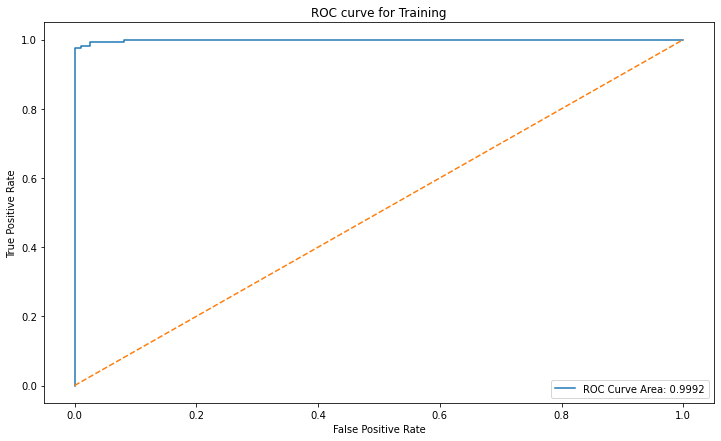

------------------------------------------------------------
Model Summary for Testing
------------------------------------------------------------
Accuracy Score is: 0.9469


Confusion Matrix is: 
[[69  2]
 [ 4 38]]




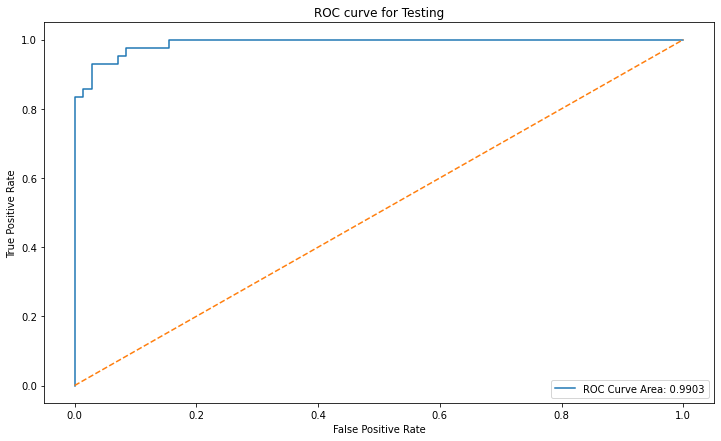

------------------------------------------------------------
Averaging all metrics
------------------------------------------------------------
               acc  precision    recall  f1-score       auc
training  0.983699   0.983735  0.983699  0.983676  0.998637
test      0.960472   0.960888  0.960472  0.960372  0.988663


,acc,precision,recall,f1-score,auc
training,0.983699,0.983735,0.983699,0.983676,0.998637
test,0.960472,0.960888,0.960472,0.960372,0.988663


In [14]:
algo = 'supervised-svm'
summary['Supervized L1 SVM'] = monte_carlo_svm(wdbc_data, 30, algo)
df = pd.DataFrame(summary['Supervized L1 SVM'])
df

*1(b)-ii. **Semi-Supervised Learning/ Self-training:** Select 50% of the positive class along with 50% of the negative class in the training set as labeled data and the rest as unlabelled data. You can select them randomly.*

1(b)-ii-A. Train an $L1$-penalized SVM to classify the labeled data Use normalized data. Choose the penalty parameter using 5 fold cross validation

1(b)-ii-B. Find the unlabeled data point that is the farthest to the decision boundary of the SVM. Let the SVM label it (ignore its true label), and add it to the labeled data, and retrain the SVM. Continue this process until all unlabeled data are used. Test the final SVM on the test data and the average accuracy, precision, recall, $F_1-score$, and $AUC$, for both training and test sets over your $M$ runs. Plot the ROC and report the confusion matrix for training and testing in one of the runs.

In [15]:
def semi_supervised_svm(trainX, trainY, settings):
    labeled_idx = []
    unlabeled_idx = []
    
    for c in [0, 1]:
        c_idx, = np.where(trainY == c)
        idx_num = round(len(c_idx) * 0.5)
        select_idx = np.random.choice(c_idx, idx_num, replace=False)
        labeled_idx.extend(select_idx)
    
    for i in range(len(trainX)):
        if i not in labeled_idx:
            unlabeled_idx.append(i)

    labeledX = trainX.iloc[labeled_idx].to_numpy().tolist()
    labeledY = trainY.iloc[labeled_idx].to_numpy().tolist()
    unlabeledX = trainX.iloc[unlabeled_idx].to_numpy().tolist()
    unlabeledY = trainY.iloc[unlabeled_idx].to_numpy().tolist()
    
    clf = GridSearchCV(estimator=LinearSVC(penalty='l1', dual=False), **settings)
    clf.fit(labeledX, labeledY)
    
    while len(unlabeledX) > 0:
        scores = clf.decision_function(unlabeledX)
        sorted_idx = sorted([i for i in range(len(unlabeledX))], 
                            key=lambda x : abs(scores[x]))
        unlabeledX = [unlabeledX[i] for i in sorted_idx]
        unlabeledY = [unlabeledY[i] for i in sorted_idx]
        
        labeledX.append(unlabeledX.pop())
        labeledY.append(unlabeledY.pop())
        clf.best_estimator_.fit(labeledX, labeledY)
    
    return clf

Iteration: 1 | Training Accuracy: 0.9956 | Testing Accuracy: 0.9735
Best parameter setting: {'C': 10000000.0}

Iteration: 2 | Training Accuracy: 0.9781 | Testing Accuracy: 0.9735
Best parameter setting: {'C': 10000.0}

Iteration: 3 | Training Accuracy: 0.989 | Testing Accuracy: 0.9469
Best parameter setting: {'C': 10000.0}

Iteration: 4 | Training Accuracy: 0.9956 | Testing Accuracy: 0.9646
Best parameter setting: {'C': 100000.0}

Iteration: 5 | Training Accuracy: 0.989 | Testing Accuracy: 0.9646
Best parameter setting: {'C': 10000.0}

Iteration: 6 | Training Accuracy: 0.9846 | Testing Accuracy: 0.9469
Best parameter setting: {'C': 10000.0}

Iteration: 7 | Training Accuracy: 0.9781 | Testing Accuracy: 0.9646
Best parameter setting: {'C': 100000.0}

Iteration: 8 | Training Accuracy: 0.989 | Testing Accuracy: 0.9558
Best parameter setting: {'C': 1000000.0}

Iteration: 9 | Training Accuracy: 0.9868 | Testing Accuracy: 0.9646
Best parameter setting: {'C': 10000.0}

Iteration: 10 | Training

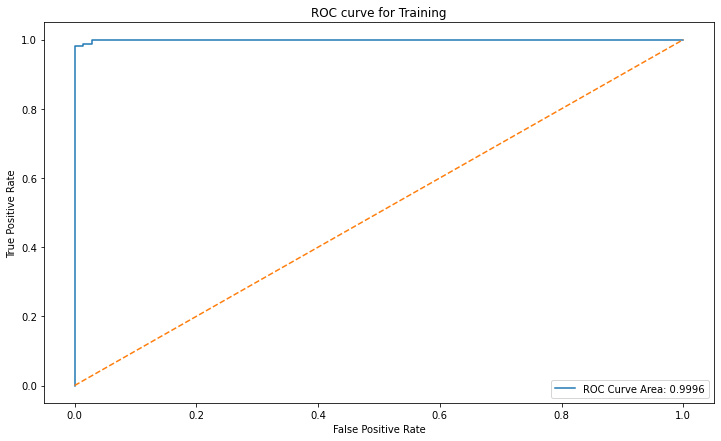

------------------------------------------------------------
Model Summary for Testing
------------------------------------------------------------
Accuracy Score is: 0.9381


Confusion Matrix is: 
[[69  2]
 [ 5 37]]




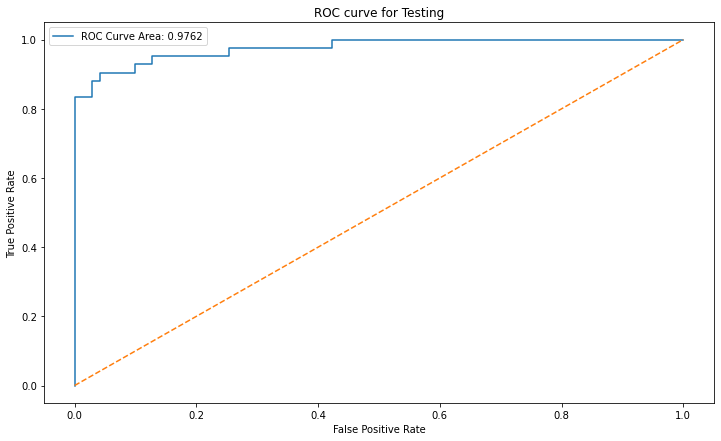

------------------------------------------------------------
Averaging all metrics
------------------------------------------------------------
               acc  precision    recall  f1-score       auc
training  0.983406   0.983425  0.983406  0.983384  0.998633
test      0.958702   0.959230  0.958702  0.958560  0.987490


,acc,precision,recall,f1-score,auc
training,0.983406,0.983425,0.983406,0.983384,0.998633
test,0.958702,0.959230,0.958702,0.958560,0.987490


In [16]:
algo = 'semi-supervised-svm'
summary['Semi-Supervized L1 SVM'] = monte_carlo_svm(wdbc_data, 30, algo)
df = pd.DataFrame(summary['Semi-Supervized L1 SVM'])
df

*1(b)-iii. **Unsupervised Learning:** Run k-means algorithm on the whole training set. Ignore the labels of the data, and assume $k = 2$.*

**Note:**

> Answers to all 1(b)-iii-A, 1(b)-iii-B, 1(b)-iii-C is written below the questions list together

1(b)-iii-A. Run the k-means algorithm multiple times. Make sure that you initialize the algoritm randomly. How do you make sure that the algorithm was not trapped in a local minimum?

**Observation:**
> - We can set the number of iterations so that we can avoid being trapped in a local minimum.

1(b)-iii-B. Compute the centers of the two clusters and find the closest 30 data points to each center. Read the true labels of those 30 data points and take a majority poll within them. The majority poll becomes the label predicted by k-means for the members of each cluster. Then compare the labels provided by k-means with the true labels of the training data and report the average accuracy, precision, recall, $F_1-score$, and $AUC$ over $M$ runs, and ROC and the confusion matrix for one of the runs.


1(b)-iii-C. Classify test data based on their proximity to the centers of the clusters. Report the average accuracy, precision, recall, $F_1-score$, and $AUC$ over $M$ runs, and ROC and the confusion matrix for one of the runs for the test data


In [17]:
from scipy.special import softmax

def get_distance(centers, X, cluster_label):
    dist = np.ndarray((X.shape[0],))
    proba = np.ndarray((X.shape[0], 2))
    for i, x in enumerate(X):
        center = centers[cluster_label[i]]
        dist[i] = np.linalg.norm(x - center)
        proba[i, 0] = np.linalg.norm(x - centers[0])
        proba[i, 1] = np.linalg.norm(x - centers[1])
    
    proba = softmax(proba, axis=1).astype(np.float64)
    return dist, proba

def get_majority(X, cluster_label, dist, Y):
    label2cluster = np.ndarray((2,), dtype='int')
    major_label = cluster_label.copy()
    for cluster in [0, 1]:
        sample_idx, = np.where(cluster_label == cluster)
        top30 = sorted(sample_idx.tolist(), key=lambda i : dist[i])[:30]
        majority = Y.iloc[top30].value_counts().index[0]
        major_label[sample_idx] = majority
        label2cluster[majority] = cluster
    return label2cluster, major_label

def predict_and_evaluate_model_v2(dataY, dataPredY, dataPredY_prob):
    dataReport = classification_report(dataY, dataPredY, output_dict=True)
    tmp_data_res = evaluate_metrics(dataY, dataPredY, dataPredY_prob, dataReport)
    return {
        'data_report': dataReport,
        'tmp_data_res': tmp_data_res,
        'y_data_pred': dataPredY,
        'y_data_pred_prob': dataPredY_prob,
    }

In [18]:
def splitData(data, random_state, test_size=0.2):
    np.random.seed(random_state)
    b_idx, = np.where(data['label'] == 0)
    b_test_num = round(len(b_idx) * test_size)
    b_test_idx = np.random.choice(b_idx, b_test_num, replace=False)
    m_idx, = np.where(data['label'] == 1)
    m_test_num = round(len(m_idx) * test_size)
    m_test_idx = np.random.choice(m_idx, m_test_num, replace=False)
    test_idx = np.concatenate([b_test_idx, m_test_idx])
    train_idx = np.array([i for i in range(data.shape[0]) if i not in test_idx])
    trainX = data.iloc[train_idx, 2:].copy()
    trainY = data.iloc[train_idx, 1].copy()
    testX = data.iloc[test_idx, 2:].copy()
    testY = data.iloc[test_idx, 1].copy()
    
    return trainX, trainY, testX, testY

def normalizeData(trainX, testX):
    scaler = Normalizer()
    norm_trainX = scaler.fit_transform(trainX)
    norm_testX = scaler.transform(testX)
    return norm_trainX, norm_testX

def evalMetrics(ground_truth, predict, prob, report):
    acc = report['accuracy']
    fpr, tpr, thresholds = roc_curve(ground_truth, prob, pos_label=1)
    roc_auc = round(auc(fpr, tpr), 4)
    return {
        'acc' : acc,
        'precision' : report['weighted avg']['precision'],
        'recall' : report['weighted avg']['recall'],
        'f1-score' : report['weighted avg']['f1-score'],
        'auc' : roc_auc
    }

In [19]:
from sklearn.cluster import KMeans
from sklearn.cluster import SpectralClustering
from sklearn.neighbors import KNeighborsClassifier

def monte_carlo_kmeans_spectral(data, n, algo):
    print ('=' * 60)
    print (f'Running method for {algo}')
    print ('=' * 60)
    
    cols = ['acc', 'precision', 'recall', 'f1-score', 'auc']
    train_resdf = pd.DataFrame(columns=cols)
    test_resdf = pd.DataFrame(columns=cols)
    
    for i in range(n):
        trainX, trainY, testX, testY = splitData(data, random_state=i, test_size=0.2)
        trainX, testX = normalizeData(trainX, testX)
        
        if algo == 'Unsupervised-KMeans':
            clusterer = KMeans(n_clusters=2, n_init = 15, random_state=i).fit(trainX)

            # training
            train_cluster_label = clusterer.predict(trainX)
            dist, trainPredY_prob = get_distance(clusterer.cluster_centers_, trainX, train_cluster_label)
            label2cluster, trainPredY = get_majority(trainX, train_cluster_label, dist, trainY)
        elif algo == 'Unsupervised-Spectral':
            cluster_label = SpectralClustering(n_clusters=2, 
                                               assign_labels='kmeans', 
                                               affinity='rbf', 
                                               eigen_tol = 1e-2, 
                                               eigen_solver = 'arpack', 
                                               random_state=0).fit_predict(trainX)
            cluster_centers = []
            for clus in [0,1]:
                cluster_centers.append(np.mean(trainX[cluster_label==clus], axis = 0).tolist())

            # build a KNN classifier
            knn = KNeighborsClassifier(n_neighbors=1)
            knn.fit(trainX, cluster_label)
            
            # training
            train_cluster_label = knn.predict(trainX)
            dist, trainPredY_prob = get_distance(cluster_centers, trainX, train_cluster_label)
            label2cluster, trainPredY = get_majority(trainX, train_cluster_label, dist, trainY)
        
        
        
        pos_cluster = label2cluster[0]
        trainPredY_prob = trainPredY_prob[:, pos_cluster]
        trainReport = classification_report(trainY, trainPredY, output_dict=True)
        tmp_train_res = evalMetrics(trainY, trainPredY, trainPredY_prob, trainReport)
        train_resdf = train_resdf.append(tmp_train_res, ignore_index=True)
        
        # test
        if algo == 'Unsupervised-KMeans':
            test_cluster_label = clusterer.predict(testX)
            dist, testPredY_prob = get_distance(clusterer.cluster_centers_, testX, test_cluster_label)
        elif algo == 'Unsupervised-Spectral':
            test_cluster_label = knn.predict(testX)
            dist, testPredY_prob = get_distance(cluster_centers, testX, test_cluster_label)
            
        
        label2cluster, testPredY = get_majority(testX, test_cluster_label, dist, testY)
        pos_cluster = label2cluster[0]
        testPredY_prob = testPredY_prob[:, pos_cluster]
        testReport = classification_report(testY, testPredY, output_dict=True)
        tmp_test_res = evalMetrics(testY, testPredY, testPredY_prob, testReport)
        test_resdf = test_resdf.append(tmp_test_res, ignore_index=True)
        
        train_accuracy = trainReport['accuracy']
        test_accuracy = testReport['accuracy']
        print(f'Iteration: {i + 1} | Training Accuracy: {round(train_accuracy, 4)} | Testing Accuracy: {round(test_accuracy, 4)}')
    
    print('-' * 80)
    print('\nDetail report of 30th run of Monte-Calo\n')
    
    calculate_model_summary(trainY, trainPredY, trainPredY_prob, 'Training')
    calculate_model_summary(testY, testPredY, testPredY_prob, 'Test')
    
    summary = summarize_results(train_resdf, test_resdf)
    return summary

Running method for Unsupervised-KMeans
Iteration: 1 | Training Accuracy: 0.8882 | Testing Accuracy: 0.8761
Iteration: 2 | Training Accuracy: 0.8706 | Testing Accuracy: 0.9558
Iteration: 3 | Training Accuracy: 0.8969 | Testing Accuracy: 0.8496
Iteration: 4 | Training Accuracy: 0.886 | Testing Accuracy: 0.9115
Iteration: 5 | Training Accuracy: 0.8991 | Testing Accuracy: 0.8761
Iteration: 6 | Training Accuracy: 0.886 | Testing Accuracy: 0.8673
Iteration: 7 | Training Accuracy: 0.8794 | Testing Accuracy: 0.8938
Iteration: 8 | Training Accuracy: 0.886 | Testing Accuracy: 0.8673
Iteration: 9 | Training Accuracy: 0.8882 | Testing Accuracy: 0.8584
Iteration: 10 | Training Accuracy: 0.8794 | Testing Accuracy: 0.8938
Iteration: 11 | Training Accuracy: 0.8925 | Testing Accuracy: 0.8761
Iteration: 12 | Training Accuracy: 0.8794 | Testing Accuracy: 0.9115
Iteration: 13 | Training Accuracy: 0.8816 | Testing Accuracy: 0.9027
Iteration: 14 | Training Accuracy: 0.8882 | Testing Accuracy: 0.8938
Iterati

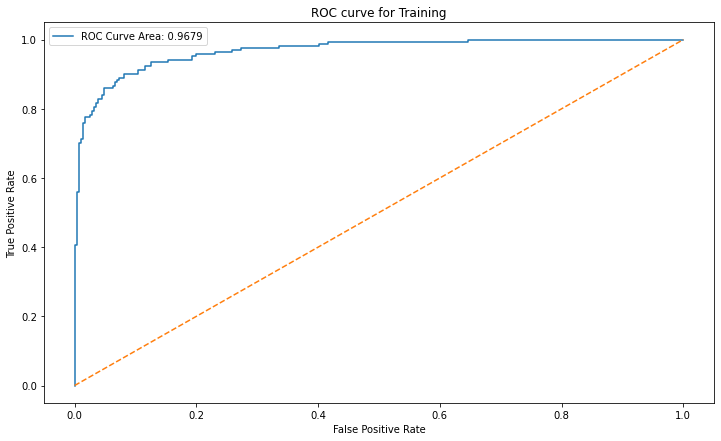

------------------------------------------------------------
Model Summary for Test
------------------------------------------------------------
Accuracy Score is: 0.8407


Confusion Matrix is: 
[[70  1]
 [17 25]]




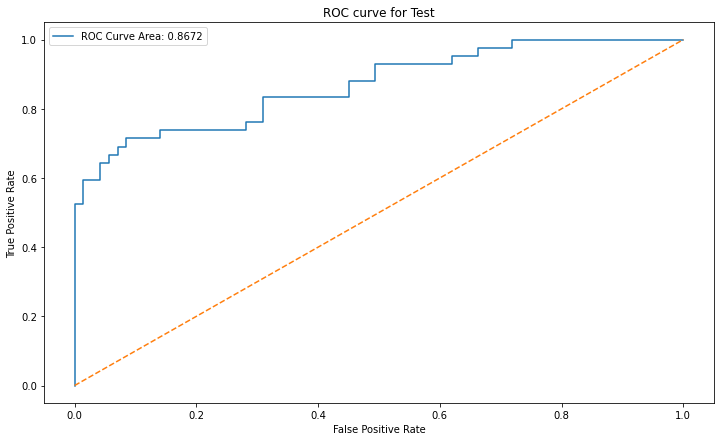

------------------------------------------------------------
Averaging all metrics
------------------------------------------------------------
               acc  precision    recall  f1-score       auc
training  0.887792   0.896542  0.887792  0.883912  0.950717
test      0.882301   0.894138  0.882301  0.877143  0.945860


,acc,precision,recall,f1-score,auc
training,0.887792,0.896542,0.887792,0.883912,0.950717
test,0.882301,0.894138,0.882301,0.877143,0.945860


In [20]:
algo = 'Unsupervised-KMeans'
summary['Unsupervised KMeans'] = monte_carlo_kmeans_spectral(wdbc_data, 30, algo)
df = pd.DataFrame(summary['Unsupervised KMeans'])
df

*1(b)-iv. **Spectral Clustering:** Repeat 1(b)iii using spectral clustering, which is clustering based on kernels. Research what spectral clustering is. Use RBF kernel with gamma=1 or find a gamma for which the two clutsres have the same balance as the one in original data set (if the positive class has $p$ and the negative class has $n$
samples, the two clusters must have $p$ and $n$ members). Do not label data based on their proximity to cluster center, because spectral clustering may give you non-convex clusters . Instead, use fit−predict method*

Running method for Unsupervised-Spectral
Iteration: 1 | Training Accuracy: 0.886 | Testing Accuracy: 0.885
Iteration: 2 | Training Accuracy: 0.8684 | Testing Accuracy: 0.9204
Iteration: 3 | Training Accuracy: 0.8925 | Testing Accuracy: 0.8407
Iteration: 4 | Training Accuracy: 0.8794 | Testing Accuracy: 0.8761
Iteration: 5 | Training Accuracy: 0.8838 | Testing Accuracy: 0.8761
Iteration: 6 | Training Accuracy: 0.8838 | Testing Accuracy: 0.8761
Iteration: 7 | Training Accuracy: 0.8728 | Testing Accuracy: 0.8938
Iteration: 8 | Training Accuracy: 0.8838 | Testing Accuracy: 0.8496
Iteration: 9 | Training Accuracy: 0.886 | Testing Accuracy: 0.8496
Iteration: 10 | Training Accuracy: 0.8772 | Testing Accuracy: 0.8761
Iteration: 11 | Training Accuracy: 0.8904 | Testing Accuracy: 0.8496
Iteration: 12 | Training Accuracy: 0.8794 | Testing Accuracy: 0.8938
Iteration: 13 | Training Accuracy: 0.8794 | Testing Accuracy: 0.8938
Iteration: 14 | Training Accuracy: 0.8794 | Testing Accuracy: 0.885
Iterat

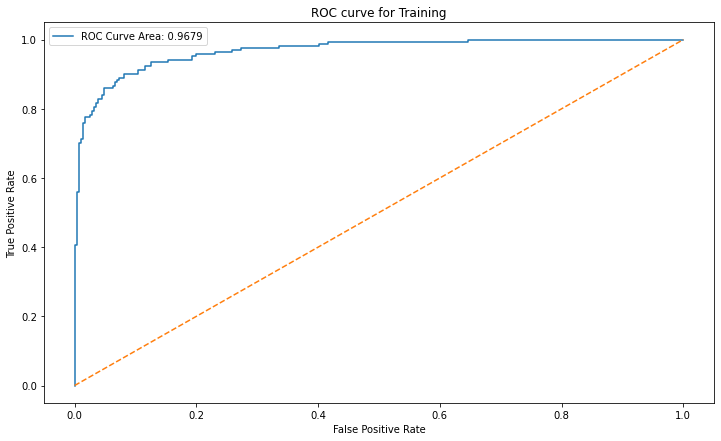

------------------------------------------------------------
Model Summary for Test
------------------------------------------------------------
Accuracy Score is: 0.823


Confusion Matrix is: 
[[69  2]
 [18 24]]




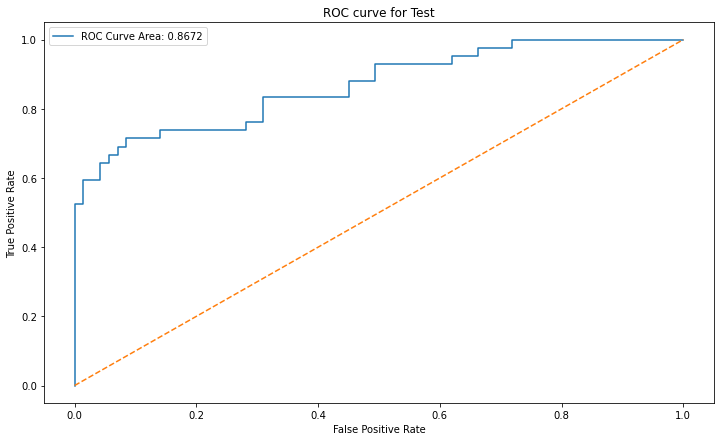

------------------------------------------------------------
Averaging all metrics
------------------------------------------------------------
               acc  precision    recall  f1-score       auc
training  0.882895   0.893003  0.882895  0.878464  0.950147
test      0.871681   0.885106  0.871681  0.865377  0.945257


,acc,precision,recall,f1-score,auc
training,0.882895,0.893003,0.882895,0.878464,0.950147
test,0.871681,0.885106,0.871681,0.865377,0.945257


In [21]:
algo = 'Unsupervised-Spectral'
summary['Unsupervised-Spectral'] = monte_carlo_kmeans_spectral(wdbc_data, 30, algo)
df = pd.DataFrame(summary['Unsupervised-Spectral'])
df

*1(b)-v. One can expect that supervised learning on the full data set works better than semi-supervised learning with half of the data set labeled.One can expect that unsupervised learning underperforms in such situations. Compare the results you obtained by those methods.*

In [22]:
def summarization():
    for summ in summary.keys():
        print('\n')
        print('='*60)
        print(summ)
        print('='*60)
        print(summary[summ])

In [23]:
summarization()



Supervized L1 SVM
               acc  precision    recall  f1-score       auc
training  0.983699   0.983735  0.983699  0.983676  0.998637
test      0.960472   0.960888  0.960472  0.960372  0.988663


Semi-Supervized L1 SVM
               acc  precision    recall  f1-score       auc
training  0.983406   0.983425  0.983406  0.983384  0.998633
test      0.958702   0.959230  0.958702  0.958560  0.987490


Unsupervised KMeans
               acc  precision    recall  f1-score       auc
training  0.887792   0.896542  0.887792  0.883912  0.950717
test      0.882301   0.894138  0.882301  0.877143  0.945860


Unsupervised-Spectral
               acc  precision    recall  f1-score       auc
training  0.882895   0.893003  0.882895  0.878464  0.950147
test      0.871681   0.885106  0.871681  0.865377  0.945257


**Observation:**
> Looking at the summarization results above, we can deduce that Supervised performs better than Semi-Supervised which in turn performs better than Unsupervised. However, the difference is far more pronounced and significant between semi-supervised and unsupervised than between supervised and semi-supervised. This is an expected trend since the supervised strategy alreadu has more information of labels as guidance to make the prediction where as semi-supervised has less. Unsupervised on the other hand makes predictions based on the similarity of features and hence does not perform as good as either the supervised or the semi-supervised.

### 2. Active Learning Using Support Vector Machines

**2(a). Download the banknote authentication Data Set from: https://archive.ics.uci.edu/ml/datasets/banknote+authentication. Choose 472 data points randomly as the test set, and the remaining 900 points as the training set. This is a binary classification problem.**

In [24]:
banknote_data = "../data/data_banknote_authentication.txt"

banknote_data = pd.read_csv(banknote_data, header=None)
banknote_data.columns = ['variance', 'skewness', 'curtosis', 'entropy', 'class']
banknote_data

,variance,skewness,curtosis,entropy,class
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


In [25]:
banknote_data['class'].value_counts()

0    762
1    610
Name: class, dtype: int64

In [26]:
def random_split():    
    train_dp = 900
    test_dp = 472

    test_idx = np.random.choice(banknote_data.shape[0], test_dp, replace=False)

    temp_list = []
    for i in range(banknote_data.shape[0]):
        if i not in test_idx:
            temp_list.append(i);

    train_idx = np.array(temp_list)
    return {
        'train_idx': train_idx,
        'test_idx': test_idx,
    }

In [27]:
index = random_split()
banknote_train = banknote_data.iloc[index['train_idx']]
banknote_test = banknote_data.iloc[index['test_idx']]

In [28]:
banknote_train

,variance,skewness,curtosis,entropy,class
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
5,4.36840,9.67180,-3.9606,-3.16250,0
7,2.09220,-6.81000,8.4636,-0.60216,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


In [29]:
banknote_test

,variance,skewness,curtosis,entropy,class
989,-6.75260,8.81720,-0.061983,-3.72500,1
765,-3.84830,-12.80470,15.682400,-1.28100,1
1036,-2.38980,-0.78427,3.014100,0.76205,1
268,0.92970,-3.79710,4.642900,-0.29570,0
1106,-0.12690,-1.15050,-0.951380,0.57843,1
...,...,...,...,...,...
1360,-0.24745,1.93680,-2.469700,-0.80518,1
274,5.27560,0.13863,0.121380,1.14350,0
509,-0.29510,9.04890,-0.527250,-2.07890,0
930,-2.22140,-0.23798,0.560080,0.05602,1


**2(b). Repeat each of the following two procedures 50 times. You will have 50 errors for 90 SVMs per each procedure.**

*2(b)-i. Train a SVM with a pool of 10 randomly selected data points from the training set using linear kernel and $L1-penalty$. Select the penalty parameter using 5-fold cross validation. Repeat this process by adding 10 other randomly selected data points to the pool, until you use all the 900 points. Do NOT replace the samples back into the training set at each step. Calculate the test error for each SVM. You will have 90 SVMs that were trained using 10, 20, 30, ... , 900 data points and their 90 test errors. You have implemented passive learning*

In [30]:
def passive_learning(trainX, trainY, testX, testY, settings):
    touse_idx = np.arange(trainX.shape[0])
    
    used_idx = []
    acc_list = []
    
    while len(touse_idx) > 0:
        np.random.shuffle(touse_idx)
        pool, touse_idx = touse_idx[:10], touse_idx[10:]
        used_idx.extend(pool)
        
        used_trainX, used_trainY = trainX.iloc[used_idx], trainY.iloc[used_idx]
        
        clf = GridSearchCV(estimator=LinearSVC(penalty='l1', dual=False), **settings)
        clf.fit(used_trainX, used_trainY)
        
        testPredY = clf.predict(testX)
        testReport = classification_report(testY, testPredY, output_dict=True)
        acc_list.append(testReport['accuracy'])
    
    return acc_list

def active_learning(trainX, trainY, testX, testY, settings):
    touse_idx = np.arange(trainX.shape[0])
    used_idx = []
    acc_list = []
    
    np.random.shuffle(touse_idx)
    pool, touse_idx = touse_idx[:10], touse_idx[10:]
    used_idx.extend(pool)
    
    while len(used_idx) <= 900:
        used_trainX, used_trainY = trainX.iloc[used_idx], trainY.iloc[used_idx]
        
        clf = GridSearchCV(estimator=LinearSVC(penalty='l1', dual=False), **settings)
        clf.fit(used_trainX, used_trainY)
        
        testPredY = clf.predict(testX)
        testReport = classification_report(testY, testPredY, output_dict=True)
        acc_list.append(testReport['accuracy'])
        
        if len(touse_idx) == 0:
            break
        
        dist = clf.decision_function(trainX.iloc[touse_idx])
        sortedarg = np.arange(len(touse_idx))
        sorted(sortedarg, key=lambda i : abs(dist[i]))
        touse_idx = touse_idx[sortedarg]
        pool, touse_idx = touse_idx[:10], touse_idx[10:]
        used_idx.extend(pool)
        
    return acc_list

def monte_carlo_algo_learning(data, n, algo):
    tuned_params = {'C' : np.logspace(-2, 7, 20)}
    
    kwargs = {
        'param_grid' : tuned_params, 
        'scoring' : 'f1_weighted',
        'n_jobs' : -1,
        'verbose' : 0
    }
    
    learning_curve = []
    
    for i in range(n):
        
        index = random_split()
        train_idx = index['train_idx']
        test_idx = index['test_idx']
        
        train_set, test_set = data.iloc[train_idx], data.iloc[test_idx]
        trainX, trainY = train_set.iloc[:, :-1], train_set.iloc[:, -1]
        testX, testY = test_set.iloc[:, :-1], test_set.iloc[:, -1]
        trainX, testX = get_normalized_data(trainX, testX)
        kwargs['cv'] = StratifiedKFold(5, random_state=i, shuffle=True)
        
        if (algo == 'passive'):            
            # passive learning
            acc_list = passive_learning(trainX, trainY, testX, testY, kwargs)
            learning_curve.append(acc_list)
        elif (algo == 'active'):
            # passive learning
            acc_list = active_learning(trainX, trainY, testX, testY, kwargs)
            learning_curve.append(acc_list)
        
        print(f"Iteration {i + 1} | Test accuracy (10 samples): {round(acc_list[0], 4)} | Test accuracy (900 samples): {round(acc_list[-1], 4)}")
    
    learning_curve = np.array(learning_curve)
    learning_curve = np.mean(learning_curve, axis=0)
    return learning_curve

In [31]:
iterations = 50
algo = 'passive'
passive_learning_curve = monte_carlo_algo_learning(banknote_data, iterations, algo)

Iteration 1 | Test accuracy (10 samples): 0.8496 | Test accuracy (900 samples): 0.9979
Iteration 2 | Test accuracy (10 samples): 0.9131 | Test accuracy (900 samples): 0.9915
Iteration 3 | Test accuracy (10 samples): 0.8263 | Test accuracy (900 samples): 0.9936
Iteration 4 | Test accuracy (10 samples): 0.9258 | Test accuracy (900 samples): 0.9958
Iteration 5 | Test accuracy (10 samples): 0.8326 | Test accuracy (900 samples): 0.9915
Iteration 6 | Test accuracy (10 samples): 0.7733 | Test accuracy (900 samples): 0.9958
Iteration 7 | Test accuracy (10 samples): 0.8835 | Test accuracy (900 samples): 0.9936
Iteration 8 | Test accuracy (10 samples): 0.6419 | Test accuracy (900 samples): 0.9979
Iteration 9 | Test accuracy (10 samples): 0.9195 | Test accuracy (900 samples): 0.9936
Iteration 10 | Test accuracy (10 samples): 0.9597 | Test accuracy (900 samples): 0.9915
Iteration 11 | Test accuracy (10 samples): 0.8559 | Test accuracy (900 samples): 0.9936
Iteration 12 | Test accuracy (10 samples)

*2(b)-ii. Train a SVM with a pool of 10 randomly selected data points from the training set using linear kernel and $L1-penalty$. Select the parameters of the SVM with 5-fold cross validation. Choose the 10 closest data points in the training set to the hyperplane of the SVM and add them to the pool. Do not replace the samples back into the training set. Train a new SVM using the pool. Repeat this process until all training data is used. You will have 90 SVMs that were trained using 10, 20, 30,..., 900 data points and their 90 test errors. You have implemented active learning*

In [32]:
iterations = 50
algo = 'active'
active_learning_curve = monte_carlo_algo_learning(banknote_data, iterations, algo)

Iteration 1 | Test accuracy (10 samples): 0.9597 | Test accuracy (900 samples): 0.9958
Iteration 2 | Test accuracy (10 samples): 0.9852 | Test accuracy (900 samples): 0.9936
Iteration 3 | Test accuracy (10 samples): 0.8453 | Test accuracy (900 samples): 0.9979
Iteration 4 | Test accuracy (10 samples): 0.8581 | Test accuracy (900 samples): 0.9936
Iteration 5 | Test accuracy (10 samples): 0.8686 | Test accuracy (900 samples): 0.9958
Iteration 6 | Test accuracy (10 samples): 0.9492 | Test accuracy (900 samples): 0.9958
Iteration 7 | Test accuracy (10 samples): 0.5784 | Test accuracy (900 samples): 0.9958
Iteration 8 | Test accuracy (10 samples): 0.9894 | Test accuracy (900 samples): 0.9894
Iteration 9 | Test accuracy (10 samples): 0.6504 | Test accuracy (900 samples): 0.9958
Iteration 10 | Test accuracy (10 samples): 0.8729 | Test accuracy (900 samples): 0.9936
Iteration 11 | Test accuracy (10 samples): 0.8771 | Test accuracy (900 samples): 0.9915
Iteration 12 | Test accuracy (10 samples)

**2(c). Average the 50 test errors for each of the incrementally trained 90 SVMs in 2(b)i and 2(b)ii. By doing so, you are performing a Monte Carlo simulation. Plot average test error versus number of training instances for both active and passive learners on the same figure and report your conclusions. Here, you are actually obtaining a learning curve by Monte-Carlo simulation**

In [33]:
def plot_learning_curve(active, passive):
    fig, axes = plt.subplots(figsize=(12, 7))
    axes.set_title(f"Learning Curve by Monte-Carlo Simulation")
    x = 10 * np.arange(1, 91)
    axes.plot(x, 1 - passive, label='Passive')
    axes.plot(x, 1 - active, label='Active')
    axes.set_xlabel("Training Set Size")
    axes.set_ylabel("Test Error")
    axes.legend()
    plt.show()

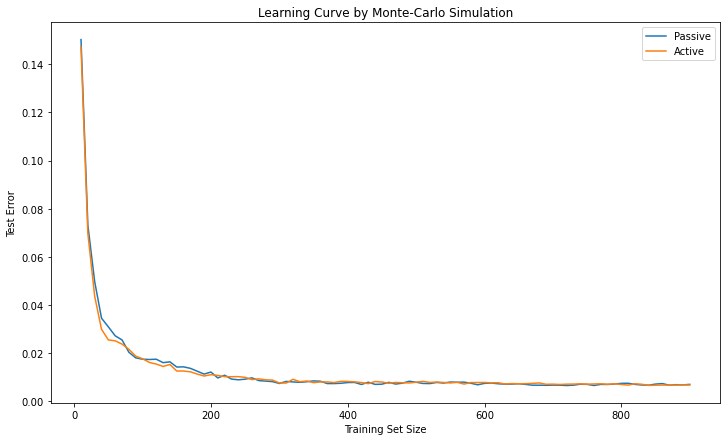

In [34]:
plot_learning_curve(active_learning_curve, passive_learning_curve)

**References:**
> - http://www.cs.cmu.edu/~hanxiaol/slides/spectral_learning.pdf
> - https://www.dataquest.io/blog/learning-curves-machine-learning/
> - https://scikit-learn.org/stable/modules/cross_validation.html